In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
#importing dataset
data = pd.read_csv('kc2_csv.csv')

In [2]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                522 non-null    float64
 1   v(g)               522 non-null    float64
 2   ev(g)              522 non-null    float64
 3   iv(g)              522 non-null    float64
 4   n                  522 non-null    float64
 5   v                  522 non-null    float64
 6   l                  522 non-null    float64
 7   d                  522 non-null    float64
 8   i                  522 non-null    float64
 9   e                  522 non-null    float64
 10  b                  522 non-null    float64
 11  t                  522 non-null    float64
 12  lOCode             522 non-null    int64  
 13  lOComment          522 non-null    int64  
 14  lOBlank            522 non-null    int64  
 15  locCodeAndComment  522 non-null    int64  
 16  uniq_Op            522 non

In [3]:
data.head(10) 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47.0,106.0,692.0,467.0,106.0,True
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23.0,67.0,343.0,232.0,65.0,True
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18.0,58.0,310.0,190.0,51.0,True
5,163.0,16.0,13.0,11.0,440.0,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19.0,53.0,260.0,180.0,31.0,True
6,152.0,11.0,6.0,11.0,432.0,2629.78,0.03,31.68,83.01,83311.56,...,114,18,17,0,18.0,50.0,256.0,176.0,21.0,True
7,3.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,1.0,0.0,1.0,0.0,1.0,False
8,14.0,2.0,1.0,2.0,22.0,88.00,0.17,5.79,15.21,509.14,...,8,0,1,0,9.0,7.0,13.0,9.0,3.0,False
9,10.0,2.0,1.0,2.0,18.0,64.53,0.14,7.00,9.22,451.71,...,8,0,0,0,8.0,4.0,11.0,7.0,3.0,False


In [4]:
X=data.iloc[:,:28]
y=data.iloc[:,-1]
#preprocessing 
#changing categorical into numerical values
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder_y=preprocessing.LabelEncoder()
y=encoder_y.fit_transform(y)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [6]:
# Count of Labels in the Training Set

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 80
Before OverSampling, counts of label '0': 285 



In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(random_state = 1)
X_train2, y_train2 = over.fit_resample(X_train, y_train.ravel())
print("After Over Sampling, counts of label '1': {}".format(sum(y_train2 == 1)))
print("After Over Sampling, counts of label '0': {}".format(sum(y_train2 == 0)))

After Over Sampling, counts of label '1': 285
After Over Sampling, counts of label '0': 285


In [8]:
under = RandomUnderSampler(random_state = 1)
X_train2, y_train2 = under.fit_resample(X_train, y_train.ravel())
  
print("After Under Sampling, counts of label '1': {}".format(sum(y_train2 == 1)))
print("After Under Sampling, counts of label '0': {}".format(sum(y_train2 == 0)))

After Under Sampling, counts of label '1': 80
After Under Sampling, counts of label '0': 80


In [9]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score
import itertools
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score,matthews_corrcoef
from sklearn.metrics import plot_precision_recall_curve

In [10]:
#fitting our model with MLP
classifier1=MLPClassifier(activation = 'tanh',max_iter=1000,alpha= 0.0001)
classifier1.fit(X_train2,y_train2)

#predicting output
y_pred_mlp=classifier1.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_mlp)
accuracy_score_mlp=metrics.accuracy_score(y_test,y_pred_mlp)
print('MLPClassifier')
print("accuracy_score {:.4f}".format(accuracy_score_mlp))

#for precision
precision_mlp=metrics.precision_score(y_test,y_pred_mlp,average='weighted')
print("precision_score={:.4f}".format(precision_mlp))

#for recall
recall_mlp=metrics.recall_score(y_test,y_pred_mlp,average='weighted')
print("recall_score={:.4f}".format(recall_mlp))

#for f-score
fscore_mlp=metrics.f1_score(y_test,y_pred_mlp,average='weighted')
print("f-score_score={:.4f}".format(fscore_mlp))

MLPClassifier
accuracy_score 0.9936
precision_score=0.9939
recall_score=0.9936
f-score_score=0.9937


In [11]:
#fitting model with naive bayes
classifier2=GaussianNB()
classifier2.fit(X_train2,y_train2)

#predicting output
y_pred_nb=classifier2.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_nb)
accuracy_score_nb=metrics.accuracy_score(y_test,y_pred_nb)
print('Naive Bayes Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_nb))

#for precision
precision_nb=metrics.precision_score(y_test,y_pred_nb,average='weighted')
print("precision_score={:.4f}".format(precision_nb))

#for  recall
recall_nb=metrics.recall_score(y_test,y_pred_nb,average='weighted')
print("recall_score={:.4f}".format(recall_nb))

#for  f-score
fscore_nb=metrics.f1_score(y_test,y_pred_nb,average='weighted')
print("f-score={:.4f}".format(fscore_nb))

Naive Bayes Classifier
accuracy_score1.0000
precision_score=1.0000
recall_score=1.0000
f-score=1.0000


In [12]:
#fitting our model with Deecision Tree
classifier3=DecisionTreeClassifier()
classifier3.fit(X_train2,y_train2)

#predicting output
y_pred_DT=classifier3.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_DT)
accuracy_score_DT=metrics.accuracy_score(y_test,y_pred_DT)
print('Decision Tree Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_DT))

#for precision
precision_DT=metrics.precision_score(y_test,y_pred_DT,average='weighted')
print("precision_score={:.4f}".format(precision_DT))

#for  recall
recall_DT=metrics.recall_score(y_test,y_pred_DT,average='weighted')
print("recall_score={:.4f}".format(recall_DT))

#for f-score
fscore_DT=metrics.f1_score(y_test,y_pred_DT,average='weighted')
print("f-score={:.4f}".format(fscore_DT))

Decision Tree Classifier
accuracy_score1.0000
precision_score=1.0000
recall_score=1.0000
f-score=1.0000


In [13]:
#fitting our model with svm
from sklearn.svm import SVC
classifier4=SVC(probability=True,C=1.0, kernel='rbf', degree=3, gamma='auto')
classifier4.fit(X_train2,y_train2)

#predicting output
y_pred_svm=classifier4.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_svm)
accuracy_score_svm=metrics.accuracy_score(y_test,y_pred_svm)
print('Support vector Classifier')
print("accuracy_score{:.4f}".format(accuracy_score_svm))

#for precision
precision_svm=metrics.precision_score(y_test,y_pred_svm,average='weighted')
print("precision_score={:.4f}".format(precision_svm))

#for recall
recall_svm=metrics.recall_score(y_test,y_pred_svm,average='weighted')
print("recall_score={:.4f}".format(recall_svm))

#for f-score
fscore_svm=metrics.f1_score(y_test,y_pred_svm,average='weighted')
print("f-score={:.4f}".format(fscore_svm))

Support vector Classifier
accuracy_score0.9809
precision_score=0.9828
recall_score=0.9809
f-score=0.9813


In [14]:
#fitting model with KNeighborsClassifier
classifier5=KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_train2,y_train2)

#predicting output
y_pred_knn=classifier5.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_knn)
accuracy_score_knn=metrics.accuracy_score(y_test,y_pred_knn)
print('KNeighborsClassifier')
print("accuracy_score{:.4f}".format(accuracy_score_knn))

#for precision
precision_knn=metrics.precision_score(y_test,y_pred_knn,average='weighted')
print("precision_score={:.4f}".format(precision_knn))

#for recall
recall_knn=metrics.recall_score(y_test,y_pred_knn,average='weighted')
print("recall_score={:.4f}".format(recall_knn))

#for f-score
fscore_knn=metrics.f1_score(y_test,y_pred_knn,average='weighted')
print("f-score={:.4f}".format(fscore_knn))

KNeighborsClassifier
accuracy_score0.9809
precision_score=0.9828
recall_score=0.9809
f-score=0.9813


In [15]:
#fitting model with RandomForest
classifier6=RandomForestClassifier()
classifier6.fit(X_train2,y_train2)

#predicting output
y_pred_rf=classifier6.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_rf)
accuracy_score_rf=metrics.accuracy_score(y_test,y_pred_rf)
print('RandomForest')
print("accuracy_score{:.4f}".format(accuracy_score_rf))

#for precision
precision_rf=metrics.precision_score(y_test,y_pred_rf,average='weighted')
print("precision_score={:.4f}".format(precision_rf))

#for recall
recall_rf=metrics.recall_score(y_test,y_pred_rf,average='weighted')
print("recall_score={:.4f}".format(recall_rf))

#for f-score
fscore_rf=metrics.f1_score(y_test,y_pred_rf,average='weighted')
print("f-score={:.4f}".format(fscore_rf))

RandomForest
accuracy_score0.9809
precision_score=0.9828
recall_score=0.9809
f-score=0.9813


In [16]:
#fitting model with LogisticRegression
classifier7=LogisticRegression()
classifier7.fit(X_train2,y_train2)

#predicting output
y_pred_lr=classifier7.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_lr)
accuracy_score_lr=metrics.accuracy_score(y_test,y_pred_lr)
print('LogisticRegression')
print("accuracy_score{:.4f}".format(accuracy_score_lr))

#for precision
precision_lr=metrics.precision_score(y_test,y_pred_lr,average='weighted')
print("precision_score={:.4f}".format(precision_lr))

#for recall
recall_lr=metrics.recall_score(y_test,y_pred_lr,average='weighted')
print("recall_score={:.4f}".format(recall_lr))

#for f-score
fscore_lr=metrics.f1_score(y_test,y_pred_lr,average='weighted')
print("f-score={:.4f}".format(fscore_lr))

LogisticRegression
accuracy_score1.0000
precision_score=1.0000
recall_score=1.0000
f-score=1.0000


In [17]:
#fitting model with AdaBoostClassifier
classifier8=AdaBoostClassifier()
classifier8.fit(X_train2,y_train2)

#predicting output
y_pred_AB=classifier8.predict(X_test)

#accuracy measurement
cm=metrics.confusion_matrix(y_test,y_pred_AB)
accuracy_score_AB=metrics.accuracy_score(y_test,y_pred_AB)
print('GradientBoosting')
print("accuracy_score={:.4f}".format(accuracy_score_AB))

#for precision
precision_AB=metrics.precision_score(y_test,y_pred_AB,average='weighted')
print("precision_score={:.4f}".format(precision_AB))

#for recall
recall_AB=metrics.recall_score(y_test,y_pred_AB,average='weighted')
print("recall_score={:.4f}".format(recall_AB))

#for f-score
fscore_AB=metrics.f1_score(y_test,y_pred_AB,average='weighted')
print("f-score={:.4f}".format(fscore_AB))

GradientBoosting
accuracy_score=1.0000
precision_score=1.0000
recall_score=1.0000
f-score=1.0000


In [18]:
#visualising plots
accuracy=np.array([accuracy_score_mlp,accuracy_score_nb,accuracy_score_DT,accuracy_score_svm,accuracy_score_knn,accuracy_score_rf,accuracy_score_lr,accuracy_score_AB])
precision=np.array([precision_mlp,precision_nb,precision_DT,precision_svm,precision_knn,precision_rf,precision_lr,precision_AB])
recall=np.array([recall_mlp,recall_nb,recall_DT,recall_svm,recall_knn,recall_rf,recall_lr,recall_AB])
fscore=np.array([fscore_knn,fscore_nb,fscore_DT,fscore_svm,fscore_knn,fscore_rf,fscore_lr,fscore_AB])
x=np.arange(len(accuracy))


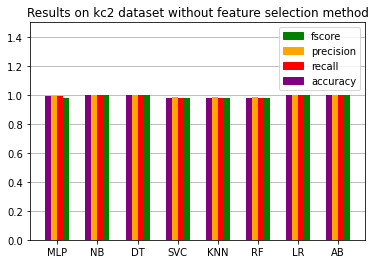

In [19]:
import matplotlib.patches as mpatches
bar_width=0.15
plt.bar(x,accuracy,width=bar_width,color='purple',zorder=2)
plt.bar(x+bar_width,precision,width=bar_width,color='orange',zorder=2)
plt.bar(x+bar_width*2,recall,width=bar_width,color='red',zorder=2)
plt.bar(x+bar_width*3,fscore,width=bar_width,color='green',zorder=2)


#for labeling part
plt.xticks(x+bar_width*1.5,['MLP','NB',"DT","SVC","KNN","RF","LR","AB"])
plt.title('Results on kc2 dataset without feature selection method')

#for making patches
green=mpatches.Patch(color='purple',label='accuracy')
orange=mpatches.Patch(color='orange',label='precision')
red=mpatches.Patch(color='red',label='recall')
purple=mpatches.Patch(color='green',label='fscore')
plt.legend(handles=[purple,orange,red,green])
plt.ylim(0,1.5)

#grid
plt.grid(axis='y')

plt.show()
